In [106]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Storing 'id' and 'secret' in txt file to hide it from rest of users when publishing the notebook.
secrets_file = open("secrets.txt","r")

In [4]:
string = secrets_file.read()

In [5]:
# Not to be published: just for academic purposes.
string

'cid:cad27f8cb5d7437fb2c92239d931b29c\ncsecret:a067c0d3dded412c94a4c95c5dff00f4'

In [6]:
# Not to be published: just for academic purposes.
string.split('\n')

['cid:cad27f8cb5d7437fb2c92239d931b29c',
 'csecret:a067c0d3dded412c94a4c95c5dff00f4']

In [7]:
# Creating a dictionary to read from it when accessing Spotify using Spotipy
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [8]:
# Not to be published: just for academic purposes.
secrets_dict

{'cid': 'cad27f8cb5d7437fb2c92239d931b29c',
 'csecret': 'a067c0d3dded412c94a4c95c5dff00f4'}

In [9]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

# Playlists

#### Getting the playlists

In [10]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [37]:
playlist1 = get_playlist_tracks("5Q7JPVmkNBFbPF5QVJFLds")
len(playlist1)

1200

In [38]:
playlist2 = get_playlist_tracks("4lTcPloX9vRUWcJ3RGZaUC")
len(playlist2)

6969

In [39]:
playlist3 = get_playlist_tracks("6ZlFKcTzJVslgjudScTX4G")
len(playlist3)

4008

In [11]:
playlist4 = get_playlist_tracks("1ukPyCwTQZ3O9v1gPWVQz4")
len(playlist4)

119

In [18]:
playlist5 = get_playlist_tracks("5K1ZnbYaYBIwof9UytdaMO")
len(playlist5)

590

In [40]:
playlist6 = get_playlist_tracks("3ZA4Q3cDjwcac2gdCewej8")
len(playlist6)

646

In [41]:
playlist7 = get_playlist_tracks("5bZOu1Yz2Xsd3ZB2HFumrv")
len(playlist7)

2167

In [42]:
playlist8 = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")
len(playlist8)

5295

In [43]:
playlist9 = get_playlist_tracks("1TdTz1c9jp0fB4s4ZRgtV3")
len(playlist9)

3210

In [44]:
playlist10 = get_playlist_tracks("0twlW4iDRhKXAJPopD8PP0")
len(playlist10)

7413

#### Using the shortest playlist (playlist4, 119 songs) to check the values that I want to extract

In [45]:
# Checking for the keys. The required information is within the 'track' subsection.
playlist4[0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [46]:
# Checking for the name of the artist: track > artists > name
playlist4[0]['track']['artists'][0]['name']

'Sex Pistols'

In [47]:
# Checking for the name of the song: track > name
playlist4[0]['track']['name']

'God Save The Queen'

In [48]:
# Checking for the URI (Uniform Resource Identifier) where the characteristics of the songs are stored
playlist4[0]['track']['uri']

'spotify:track:2mHchPRtQWet3iIS3jANr1'

#### Concatenating all playlists before pulling out the information

In [49]:
all_tracks = playlist1 + playlist2 + playlist3 + playlist4 + playlist5 + playlist6 + playlist7 + playlist8 + playlist9 + playlist10 

# DataFrame

#### Pulling out the songs + creating a DataFrame

In [ ]:
# This function is Julia's. She's shared it with me as I couldn't find a good solution to extract all the information at once.

def get_df(all_tracks):
    
    artists = []
    songs = []
    audio_features = []
    
    # first I take out the name of the artist, the song, and the dictionary that contents audio features
    for i in range(len(all_tracks)):
        
        # I have to make sure the items has values 
        if all_tracks[i]['track'] != None:
            artists.append(all_tracks[i]['track']['artists'][0]['name'])
            songs.append(all_tracks[i]['track']['name'])
            uri = all_tracks[i]['track']['uri']
            audio = sp.audio_features(uri)[0]
            audio_features.append(audio)
        else:
            print(i)
    
    # after saving the data into 3 lists, I use them to make a new data frame with 3 columns
    total_songs = pd.DataFrame({'song_title':songs,'artist':artists,'audio_features':audio_features})
    

    # now I have to extrat the dictionary from the column audio_features and give the columns the names of the keys
    flattened = pd.DataFrame(dict(total_songs['audio_features'])).transpose()
    columns = [str(col) for col in flattened.columns]
    flattened.columns = columns
    data = pd.concat([total_songs, flattened], axis=1)
    data = data.drop(['audio_features'], axis=1)
    
    return data

In [51]:
all_tracks = get_df(all_tracks)
all_tracks.head()

846
7255


Expected id of type track but found type The+Joker spotify:local:Steve+Miller+Band:Greatest+Hits:The+Joker:218


9943
9978
9979
10019
10097
10106
10297
10592
10628
10766
10767
10768
10769
10847
10971
10972
10973
29745


song_title         artist danceability energy  \
0   Peaches (feat. Daniel Caesar & Giveon)  Justin Bieber        0.698  0.684   
1                              Sunday Best       Surfaces        0.878  0.525   
2  Scared of the Dark (feat. XXXTENTACION)      Lil Wayne        0.443  0.623   
3                                 Stranger          jfarr        0.652  0.635   
4                          Fearless Pt. II       Lost Sky         0.73  0.928   

  key loudness mode speechiness acousticness instrumentalness liveness  \
0   0   -6.239    1      0.0972        0.374                0    0.434   
1   5   -6.832    1      0.0578        0.183                0   0.0714   
2   0   -6.717    0      0.0718       0.0468                0    0.247   
3   9   -5.742    1      0.0727        0.464           0.0188   0.0879   
4   6    -4.28    1      0.0515        0.285          0.00131    0.119   

  valence    tempo            type                      id  \
0   0.526   89.926  audio_features  1ZrpvgLUBHozH2PLbc4SrO   
1   0.694  112.022  audio_features  1Cv1YLb4q0RzL6pybtaMLo   
2   0.156   79.365  audio_features  3vWzyGTu6Ovo1GdrcJqH6e   
3   0.262  190.009  audio_features  5YWs2htc7xZ3O9IO1m7rQ8   
4   0.325  110.002  audio_features  649AbXFbU0UDYe2bhs9jSe   

                                    uri  \
0  spotify:track:1ZrpvgLUBHozH2PLbc4SrO   
1  spotify:track:1Cv1YLb4q0RzL6pybtaMLo   
2  spotify:track:3vWzyGTu6Ovo1GdrcJqH6e   
3  spotify:track:5YWs2htc7xZ3O9IO1m7rQ8   
4  spotify:track:649AbXFbU0UDYe2bhs9jSe   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1ZrpvgLUBHoz...   
1  https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...   
2  https://api.spotify.com/v1/tracks/3vWzyGTu6Ovo...   
3  https://api.spotify.com/v1/tracks/5YWs2htc7xZ3...   
4  https://api.spotify.com/v1/tracks/649AbXFbU0UD...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Zrp...      198082   
1  https://api.spotify.com/v1/audio-analysis/1Cv1...      158571   
2  https://api.spotify.com/v1/audio-analysis/3vWz...      233000   
3  https://api.spotify.com/v1/audio-analysis/5YWs...      209224   
4  https://api.spotify.com/v1/audio-analysis/649A...      194182   

  time_signature  
0              4  
1              4  
2              4  
3              4  
4              4

#### Saving the DataFrame in a *.csv format file

In [52]:
all_tracks.to_csv('all_tracks.csv', index=False)

#### Loading the dataset directly from the *.csv file

In [72]:
data = pd.read_csv('all_tracks.csv')

#### Understanding the information before cleaning

In [73]:
display(data.head(3))
display(data.tail(3))

song_title         artist  danceability  \
0   Peaches (feat. Daniel Caesar & Giveon)  Justin Bieber         0.698   
1                              Sunday Best       Surfaces         0.878   
2  Scared of the Dark (feat. XXXTENTACION)      Lil Wayne         0.443   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.684  0.0    -6.239   1.0       0.0972        0.3740               0.0   
1   0.525  5.0    -6.832   1.0       0.0578        0.1830               0.0   
2   0.623  0.0    -6.717   0.0       0.0718        0.0468               0.0   

   liveness  valence    tempo            type                      id  \
0    0.4340    0.526   89.926  audio_features  1ZrpvgLUBHozH2PLbc4SrO   
1    0.0714    0.694  112.022  audio_features  1Cv1YLb4q0RzL6pybtaMLo   
2    0.2470    0.156   79.365  audio_features  3vWzyGTu6Ovo1GdrcJqH6e   

                                    uri  \
0  spotify:track:1ZrpvgLUBHozH2PLbc4SrO   
1  spotify:track:1Cv1YLb4q0RzL6pybtaMLo   
2  spotify:track:3vWzyGTu6Ovo1GdrcJqH6e   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1ZrpvgLUBHoz...   
1  https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...   
2  https://api.spotify.com/v1/tracks/3vWzyGTu6Ovo...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Zrp...     198082.0   
1  https://api.spotify.com/v1/audio-analysis/1Cv1...     158571.0   
2  https://api.spotify.com/v1/audio-analysis/3vWz...     233000.0   

   time_signature  
0             4.0  
1             4.0  
2             4.0

song_title           artist  danceability  energy  key  \
31594            King For A Day  Pierce The Veil         0.403   0.965  6.0   
31595  Love You From a Distance   Ashley Kutcher         0.333   0.538  4.0   
31596                        29      Demi Lovato         0.322   0.698  1.0   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
31594    -2.238   1.0       0.0964      0.000038          0.000276    0.3410   
31595    -8.653   1.0       0.0325      0.557000          0.000000    0.0977   
31596    -3.812   0.0       0.0542      0.005070          0.000000    0.2490   

       valence    tempo            type                      id  \
31594    0.431  112.363  audio_features  1IT0WQk5J8NsaeII8ktdlZ   
31595    0.630  149.377  audio_features  4bpyaPa1xruVgE2GtsYbIW   
31596    0.288  183.963  audio_features  3gXWe15nwrjfhjYQ5RqLx7   

                                        uri  \
31594  spotify:track:1IT0WQk5J8NsaeII8ktdlZ   
31595  spotify:track:4bpyaPa1xruVgE2GtsYbIW   
31596  spotify:track:3gXWe15nwrjfhjYQ5RqLx7   

                                              track_href  \
31594  https://api.spotify.com/v1/tracks/1IT0WQk5J8Ns...   
31595  https://api.spotify.com/v1/tracks/4bpyaPa1xruV...   
31596  https://api.spotify.com/v1/tracks/3gXWe15nwrjf...   

                                            analysis_url  duration_ms  \
31594  https://api.spotify.com/v1/audio-analysis/1IT0...     236293.0   
31595  https://api.spotify.com/v1/audio-analysis/4bpy...     204000.0   
31596  https://api.spotify.com/v1/audio-analysis/3gXW...     163028.0   

       time_signature  
31594             4.0  
31595             4.0  
31596             4.0

In [74]:
#data.columns
data.shape
#data.nunique()/len(data)*100
#data.dtypes
#data.describe().T
#data.isna().sum()/len(data)*100

(31597, 20)

In [75]:
# Removing duplicate values: songs that came from multiple playlists.

data = data.drop_duplicates()
data.shape

(28168, 20)

In [77]:
# Checking for NaN values

data.isna().sum()/len(data)*100

song_title          0.014201
artist              0.014201
danceability        0.085203
energy              0.085203
key                 0.085203
loudness            0.085203
mode                0.085203
speechiness         0.085203
acousticness        0.085203
instrumentalness    0.085203
liveness            0.085203
valence             0.085203
tempo               0.085203
type                0.085203
id                  0.085203
uri                 0.085203
track_href          0.085203
analysis_url        0.085203
duration_ms         0.085203
time_signature      0.085203
dtype: float64

In [78]:
# Removing NaN rows

data = data.dropna()

In [79]:
data.shape

(28140, 20)

In [80]:
data.isna().sum()/len(data)*100

song_title          0.0
artist              0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
id                  0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

# Clustering: K-means

#### Splitting numericals and categoricals. 

In [ ]:
# K-means clustering can only handle numerical values; it is using coordinates to locate the points.
# It is therefore necessary to normalize dimensions.
# Splitting numericals and categoricals and then scaling numerical values.

In [85]:
numericals = data.select_dtypes(np.number)
numericals

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.698   0.684  0.0    -6.239   1.0       0.0972       0.37400   
1             0.878   0.525  5.0    -6.832   1.0       0.0578       0.18300   
2             0.443   0.623  0.0    -6.717   0.0       0.0718       0.04680   
3             0.652   0.635  9.0    -5.742   1.0       0.0727       0.46400   
4             0.730   0.928  6.0    -4.280   1.0       0.0515       0.28500   
...             ...     ...  ...       ...   ...          ...           ...   
31591         0.468   0.779  9.0    -4.839   1.0       0.0779       0.11200   
31592         0.777   0.658  0.0    -5.191   1.0       0.0540       0.07670   
31593         0.640   0.553  2.0    -6.420   0.0       0.0411       0.05790   
31595         0.333   0.538  4.0    -8.653   1.0       0.0325       0.55700   
31596         0.322   0.698  1.0    -3.812   0.0       0.0542       0.00507   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.4340    0.526   89.926     198082.0   
1              0.000000    0.0714    0.694  112.022     158571.0   
2              0.000000    0.2470    0.156   79.365     233000.0   
3              0.018800    0.0879    0.262  190.009     209224.0   
4              0.001310    0.1190    0.325  110.002     194182.0   
...                 ...       ...      ...      ...          ...   
31591          0.000373    0.1010    0.260  173.799     217747.0   
31592          0.000000    0.0901    0.633  110.048     190360.0   
31593          0.000000    0.0914    0.486   81.992     148471.0   
31595          0.000000    0.0977    0.630  149.377     204000.0   
31596          0.000000    0.2490    0.288  183.963     163028.0   

       time_signature  
0                 4.0  
1                 4.0  
2                 4.0  
3                 4.0  
4                 4.0  
...               ...  
31591             4.0  
31592             4.0  
31593             4.0  
31595             4.0  
31596             4.0  

[28140 rows x 13 columns]

In [91]:
categoricals = data.select_dtypes(object)
#categoricals.head()

## Scaling/Normalizing

#### Scaling numerical values using StandardScaler

In [96]:
from sklearn.preprocessing import StandardScaler
scaled_num = StandardScaler().fit_transform(numericals)
scaled_num = pd.DataFrame(scaled_num,columns=numericals.columns).head()

#### Normalizing numerical values using MinMaxScaler

In [99]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericals)
normal_num = transformer.transform(numericals)
normal_num = pd.DataFrame(normal_num, columns=numericals.columns)

## Finding K

In [ ]:
# K-means needs the user to define the number of clusters.
# It is then necessary to find the ideal number of clusters to then apply it to the algorithm.

### Finding K using values scaled with StandardScaler

#### 'Elbow method'

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

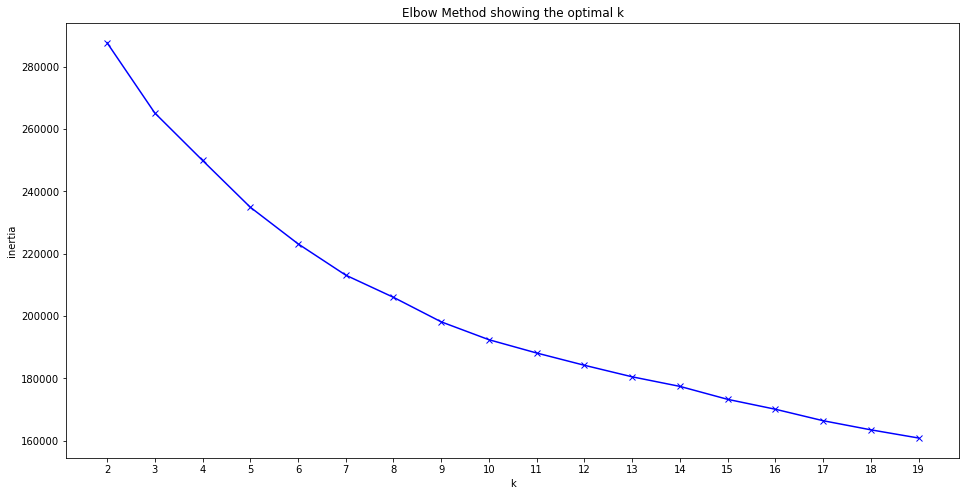

In [94]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_num)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### 'Silhouette score'

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

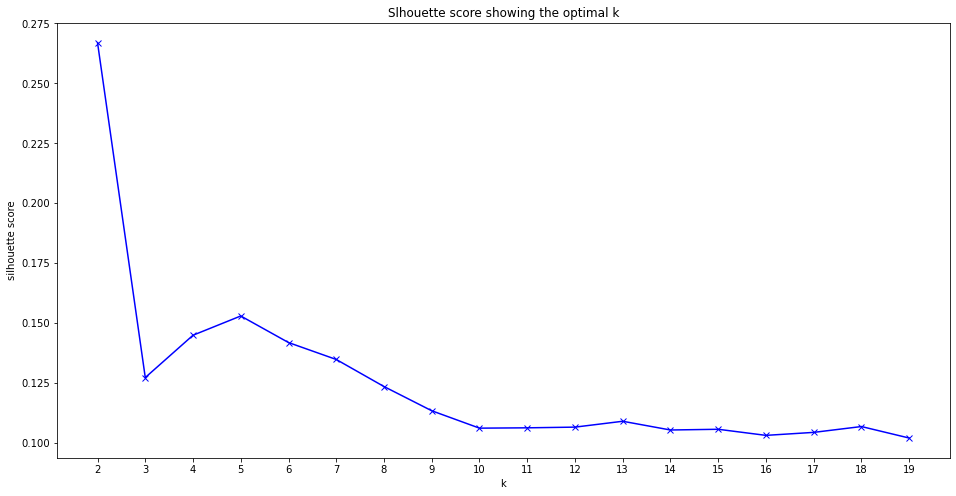

In [95]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_num)
    silhouette.append(silhouette_score(scaled_num, kmeans.predict(scaled_num)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

### Finding K using values scaled with MinMaxScaler

#### 'Elbow method'

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

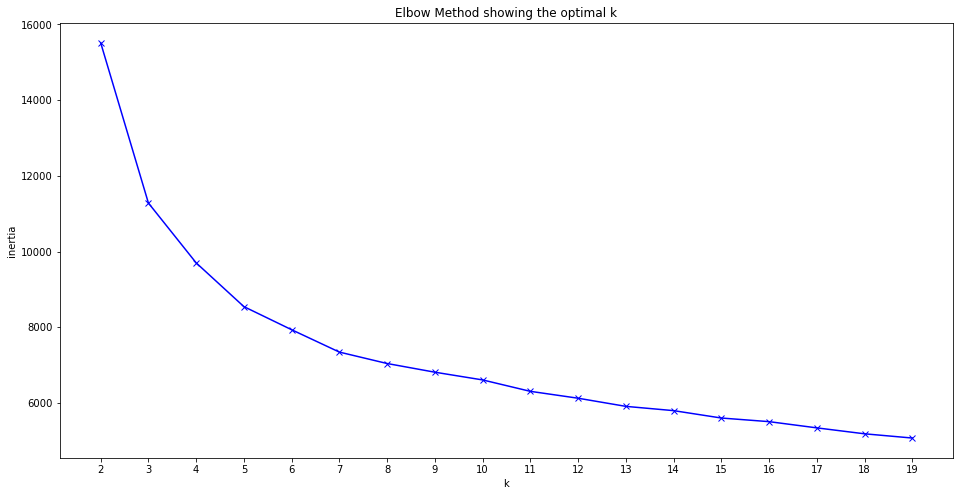

In [100]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(normal_num)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')#### 'Elbow method'

#### 'Silhouette score'

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

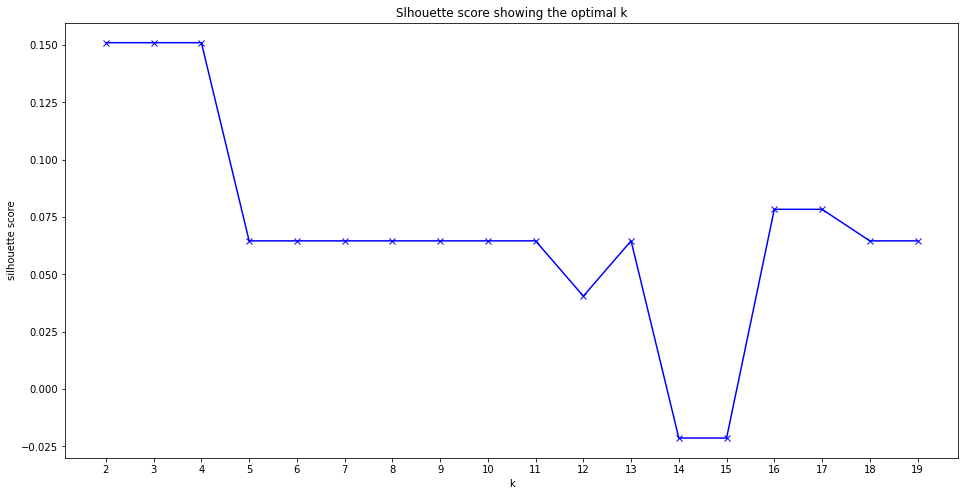

In [101]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(normal_num)
    silhouette.append(silhouette_score(scaled_num, kmeans.predict(scaled_num)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

After plotting, I decide to use the algorithm K-means: numerical values scaled with StandardScaler and 5 as a number of clusters.

In [110]:
## Got stuck here. Will continue tomorrow. 


%%time
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(scaled_num)
pred = kmeans.predict(scaled_num)

plt.figure(figsize=(5, 5))
plt.scatter(scaled_num[:, 0], scaled_num[:, 1], c=pred,alpha=0.5)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 360x360 with 0 Axes>